In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from numpy.random import seed
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
data_filesT = glob.glob("../Tell1CalibCsvT/*.csv")

In [3]:
def module_names():
    names = []
    data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    names = data[1]
    return names

In [4]:
ncol = 84
model = Sequential()

# Encoder Layers
model.add(Dense(64, activation = 'relu', input_shape=(ncol,)))
model.add(Dense(44, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))
model.add(Dense(4 , activation = 'relu'))
model.add(Dense(2 , activation = 'relu', name="bottleneck"))

# Decoder Layers
model.add(Dense(4 , activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(44, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model.compile(loss = 'mean_squared_error', optimizer = Adam())

model.summary()

W0624 13:53:54.356752 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 13:53:54.448693 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 13:53:54.456689 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 13:53:55.563003 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5440      
_________________________________________________________________
dense_2 (Dense)              (None, 44)                2860      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1080      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                350       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [5]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model.fit(data_train, data_train, batch_size=128, epochs=5, verbose=1)

W0624 13:53:59.394632 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0624 13:54:01.273472 12676 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
2304/2304 [==============================] - 5s 2ms/step - loss: 1892.3901
Epoch 2/5
2304/2304 [==============================] - 0s 57us/step - loss: 1879.1533
Epoch 3/5
2304/2304 [==============================] - 0s 62us/step - loss: 1873.6795
Epoch 4/5
2304/2304 [==============================] - 0s 85us/step - loss: 1873.1979
Epoch 5/5
2304/2304 [==============================] - 0s 78us/step - loss: 1872.3007
Epoch 1/5
2304/2304 [==============================] - 0s 32us/step - loss: 1872.9603
Epoch 2/5
2304/2304 [==============================] - 0s 36us/step - loss: 1872.4418
Epoch 3/5
2304/2304 [==============================] - 0s 33us/step - loss: 1872.4374
Epoch 4/5
2304/2304 [==============================] - 0s 31us/step - loss: 1872.4371
Epoch 5/5
2304/2304 [==============================] - 0s 33us/step - loss: 1872.4369
Epoch 1/5
2304/2304 [==============================] - 0s 80us/step - loss: 1873.3674
Epoch 2/5
2304/2304 [==============================] - 

2304/2304 [==============================] - 0s 90us/step - loss: 1884.6306
Epoch 1/5
2304/2304 [==============================] - 0s 61us/step - loss: 1883.7403
Epoch 2/5
2304/2304 [==============================] - 0s 80us/step - loss: 1883.7403
Epoch 3/5
2304/2304 [==============================] - 0s 71us/step - loss: 1883.7402
Epoch 4/5
2304/2304 [==============================] - 0s 71us/step - loss: 1883.7403
Epoch 5/5
2304/2304 [==============================] - 0s 69us/step - loss: 1883.7403
Epoch 1/5
2304/2304 [==============================] - 0s 39us/step - loss: 1885.2286
Epoch 2/5
2304/2304 [==============================] - 0s 35us/step - loss: 1885.2286
Epoch 3/5
2304/2304 [==============================] - 0s 66us/step - loss: 1885.2286
Epoch 4/5
2304/2304 [==============================] - 0s 53us/step - loss: 1885.2286
Epoch 5/5
2304/2304 [==============================] - 0s 66us/step - loss: 1885.2286 0s - loss: 1913.
Epoch 1/5
2304/2304 [==========================

Epoch 5/5
2304/2304 [==============================] - 0s 59us/step - loss: 1893.7683
Epoch 1/5
2304/2304 [==============================] - 0s 34us/step - loss: 1894.6122
Epoch 2/5
2304/2304 [==============================] - 0s 36us/step - loss: 1894.6122
Epoch 3/5
2304/2304 [==============================] - 0s 36us/step - loss: 1894.6123
Epoch 4/5
2304/2304 [==============================] - 0s 37us/step - loss: 1894.6123
Epoch 5/5
2304/2304 [==============================] - 0s 37us/step - loss: 1894.6123
Epoch 1/5
2304/2304 [==============================] - 0s 57us/step - loss: 1894.8042
Epoch 2/5
2304/2304 [==============================] - 0s 59us/step - loss: 1894.8043
Epoch 3/5
2304/2304 [==============================] - 0s 57us/step - loss: 1894.8043
Epoch 4/5
2304/2304 [==============================] - 0s 82us/step - loss: 1894.8043
Epoch 5/5
2304/2304 [==============================] - 0s 69us/step - loss: 1894.8043
Epoch 1/5
2304/2304 [==============================] -

In [6]:
chanell_encoder = Model(model.input, model.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 84)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                5440      
_________________________________________________________________
dense_2 (Dense)              (None, 44)                2860      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1080      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                350       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
__________

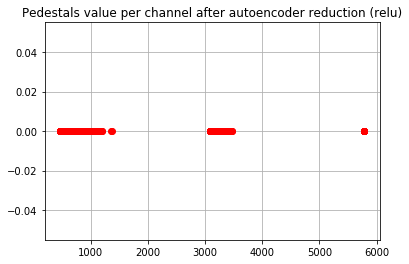

In [7]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (relu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [8]:
ncol = 84
model2 = Sequential()

# Encoder Layers
model2.add(Dense(64, activation = 'softmax', input_shape=(ncol,)))
model2.add(Dense(44, activation = 'softmax'))
model2.add(Dense(24, activation = 'softmax'))
model2.add(Dense(14, activation = 'softmax'))
model2.add(Dense(8 , activation = 'softmax'))
model2.add(Dense(4 , activation = 'softmax'))
model2.add(Dense(2 , activation = 'softmax', name="bottleneck"))

# Decoder Layers
model2.add(Dense(4 , activation = 'softmax'))
model2.add(Dense(8 , activation = 'softmax'))
model2.add(Dense(14, activation = 'softmax'))
model2.add(Dense(24, activation = 'softmax'))
model2.add(Dense(44, activation = 'softmax'))
model2.add(Dense(64, activation = 'softmax'))
model2.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model2.compile(loss = 'mean_squared_error', optimizer = Adam())

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_15 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_16 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_17 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [9]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model2.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 2s 740us/step - loss: 1895.1996
Epoch 2/10
2304/2304 [==============================] - 0s 96us/step - loss: 1894.7654
Epoch 3/10
2304/2304 [==============================] - 0s 83us/step - loss: 1894.3309
Epoch 4/10
2304/2304 [==============================] - 0s 92us/step - loss: 1893.9008
Epoch 5/10
2304/2304 [==============================] - 0s 75us/step - loss: 1893.4659
Epoch 6/10
2304/2304 [==============================] - 0s 101us/step - loss: 1893.0363
Epoch 7/10
2304/2304 [==============================] - 0s 78us/step - loss: 1892.6116
Epoch 8/10
2304/2304 [==============================] - 0s 75us/step - loss: 1892.1815
Epoch 9/10
2304/2304 [==============================] - 0s 92us/step - loss: 1891.7619
Epoch 10/10
2304/2304 [==============================] - 0s 73us/step - loss: 1891.3301
Epoch 1/10
2304/2304 [==============================] - 0s 98us/step - loss: 1891.5966
Epoch 2/10
2304/2304 [==================

2304/2304 [==============================] - 0s 83us/step - loss: 1878.2152
Epoch 5/10
2304/2304 [==============================] - 0s 108us/step - loss: 1878.1780
Epoch 6/10
2304/2304 [==============================] - 0s 94us/step - loss: 1878.1427
Epoch 7/10
2304/2304 [==============================] - 0s 65us/step - loss: 1878.1088
Epoch 8/10
2304/2304 [==============================] - 0s 95us/step - loss: 1878.0766
Epoch 9/10
2304/2304 [==============================] - 0s 68us/step - loss: 1878.0452
Epoch 10/10
2304/2304 [==============================] - 0s 65us/step - loss: 1878.0154
Epoch 1/10
2304/2304 [==============================] - 0s 59us/step - loss: 1879.4523
Epoch 2/10
2304/2304 [==============================] - 0s 47us/step - loss: 1879.4246
Epoch 3/10
2304/2304 [==============================] - 0s 45us/step - loss: 1879.3981
Epoch 4/10
2304/2304 [==============================] - 0s 47us/step - loss: 1879.3726
Epoch 5/10
2304/2304 [==============================

2304/2304 [==============================] - 0s 82us/step - loss: 1884.9964
Epoch 8/10
2304/2304 [==============================] - 0s 87us/step - loss: 1884.9925
Epoch 9/10
2304/2304 [==============================] - 0s 100us/step - loss: 1884.9886
Epoch 10/10
2304/2304 [==============================] - 0s 79us/step - loss: 1884.9848
Epoch 1/10
2304/2304 [==============================] - 0s 41us/step - loss: 1884.0902
Epoch 2/10
2304/2304 [==============================] - 0s 43us/step - loss: 1884.0865
Epoch 3/10
2304/2304 [==============================] - 0s 40us/step - loss: 1884.0829
Epoch 4/10
2304/2304 [==============================] - 0s 43us/step - loss: 1884.0793
Epoch 5/10
2304/2304 [==============================] - 0s 46us/step - loss: 1884.0757
Epoch 6/10
2304/2304 [==============================] - 0s 44us/step - loss: 1884.0720
Epoch 7/10
2304/2304 [==============================] - 0s 45us/step - loss: 1884.0684
Epoch 8/10
2304/2304 [==============================

2304/2304 [==============================] - 0s 52us/step - loss: 1889.4847
Epoch 1/10
2304/2304 [==============================] - 0s 75us/step - loss: 1889.7369
Epoch 2/10
2304/2304 [==============================] - 0s 96us/step - loss: 1889.7356
Epoch 3/10
2304/2304 [==============================] - 0s 82us/step - loss: 1889.7345
Epoch 4/10
2304/2304 [==============================] - 0s 105us/step - loss: 1889.7332
Epoch 5/10
2304/2304 [==============================] - 0s 79us/step - loss: 1889.7320
Epoch 6/10
2304/2304 [==============================] - 0s 100us/step - loss: 1889.7308
Epoch 7/10
2304/2304 [==============================] - 0s 82us/step - loss: 1889.7292
Epoch 8/10
2304/2304 [==============================] - 0s 98us/step - loss: 1889.7279
Epoch 9/10
2304/2304 [==============================] - 0s 87us/step - loss: 1889.7266
Epoch 10/10
2304/2304 [==============================] - 0s 98us/step - loss: 1889.7255
Epoch 1/10
2304/2304 [=============================

2304/2304 [==============================] - 0s 72us/step - loss: 1893.8326
Epoch 4/10
2304/2304 [==============================] - 0s 103us/step - loss: 1893.8320
Epoch 5/10
2304/2304 [==============================] - 0s 89us/step - loss: 1893.8315
Epoch 6/10
2304/2304 [==============================] - 0s 121us/step - loss: 1893.8310
Epoch 7/10
2304/2304 [==============================] - 0s 74us/step - loss: 1893.8303
Epoch 8/10
2304/2304 [==============================] - 0s 120us/step - loss: 1893.8297
Epoch 9/10
2304/2304 [==============================] - ETA: 0s - loss: 1958.70 - 0s 75us/step - loss: 1893.8290
Epoch 10/10
2304/2304 [==============================] - 0s 86us/step - loss: 1893.8286
Epoch 1/10
2304/2304 [==============================] - 0s 43us/step - loss: 1894.6723
Epoch 2/10
2304/2304 [==============================] - 0s 39us/step - loss: 1894.6717
Epoch 3/10
2304/2304 [==============================] - 0s 42us/step - loss: 1894.6712
Epoch 4/10
2304/2304 [==

In [10]:
chanell_encoder = Model(model2.input, model2.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_15 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_16 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_17 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
__________

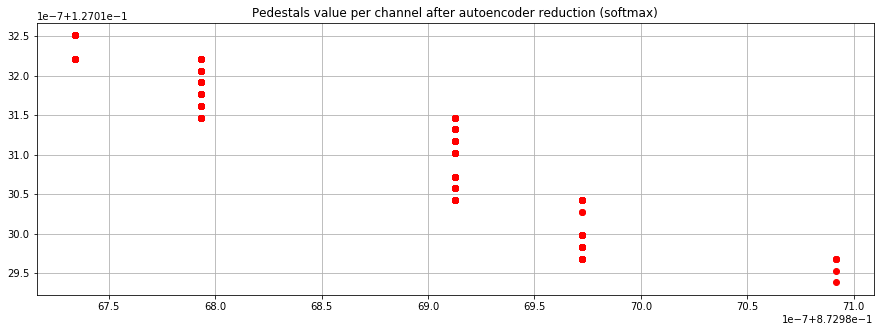

In [11]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (softmax)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [12]:
ncol = 84
model3 = Sequential()

# Encoder Layers
model3.add(Dense(64, activation = 'elu', input_shape=(ncol,)))
model3.add(Dense(44, activation = 'elu'))
model3.add(Dense(24, activation = 'elu'))
model3.add(Dense(14, activation = 'elu'))
model3.add(Dense(8 , activation = 'elu'))
model3.add(Dense(4 , activation = 'elu'))
model3.add(Dense(2 , activation = 'elu', name="bottleneck"))

# Decoder Layers
model3.add(Dense(4 , activation = 'elu'))
model3.add(Dense(8 , activation = 'elu'))
model3.add(Dense(14, activation = 'elu'))
model3.add(Dense(24, activation = 'elu'))
model3.add(Dense(44, activation = 'elu'))
model3.add(Dense(64, activation = 'elu'))
model3.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model3.compile(loss = 'mean_squared_error', optimizer = Adam())

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_28 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_29 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_30 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [13]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model3.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 5s 2ms/step - loss: 1890.5957
Epoch 2/10
2304/2304 [==============================] - 0s 45us/step - loss: 1877.7422
Epoch 3/10
2304/2304 [==============================] - 0s 44us/step - loss: 1872.3420
Epoch 4/10
2304/2304 [==============================] - 0s 46us/step - loss: 1871.7468
Epoch 5/10
2304/2304 [==============================] - 0s 43us/step - loss: 1871.7398
Epoch 6/10
2304/2304 [==============================] - 0s 43us/step - loss: 1871.7383
Epoch 7/10
2304/2304 [==============================] - 0s 46us/step - loss: 1871.7378
Epoch 8/10
2304/2304 [==============================] - 0s 44us/step - loss: 1871.7375
Epoch 9/10
2304/2304 [==============================] - 0s 45us/step - loss: 1871.7372
Epoch 10/10
2304/2304 [==============================] - 0s 46us/step - loss: 1871.7371
Epoch 1/10
2304/2304 [==============================] - 0s 79us/step - loss: 1872.4375
Epoch 2/10
2304/2304 [=====================

2304/2304 [==============================] - 0s 40us/step - loss: 1876.6793
Epoch 5/10
2304/2304 [==============================] - 0s 41us/step - loss: 1876.6792
Epoch 6/10
2304/2304 [==============================] - 0s 38us/step - loss: 1876.6793
Epoch 7/10
2304/2304 [==============================] - ETA: 0s - loss: 1861.92 - 0s 39us/step - loss: 1876.6793
Epoch 8/10
2304/2304 [==============================] - 0s 41us/step - loss: 1876.6793
Epoch 9/10
2304/2304 [==============================] - 0s 41us/step - loss: 1876.6793
Epoch 10/10
2304/2304 [==============================] - 0s 37us/step - loss: 1876.6793
Epoch 1/10
2304/2304 [==============================] - 0s 44us/step - loss: 1878.1456
Epoch 2/10
2304/2304 [==============================] - 0s 46us/step - loss: 1878.1456
Epoch 3/10
2304/2304 [==============================] - 0s 45us/step - loss: 1878.1456
Epoch 4/10
2304/2304 [==============================] - 0s 47us/step - loss: 1878.1456
Epoch 5/10
2304/2304 [=====

2304/2304 [==============================] - 0s 43us/step - loss: 1884.6305
Epoch 8/10
2304/2304 [==============================] - 0s 46us/step - loss: 1884.6306
Epoch 9/10
2304/2304 [==============================] - 0s 44us/step - loss: 1884.6306
Epoch 10/10
2304/2304 [==============================] - 0s 41us/step - loss: 1884.6306
Epoch 1/10
2304/2304 [==============================] - 0s 62us/step - loss: 1883.7402
Epoch 2/10
2304/2304 [==============================] - 0s 57us/step - loss: 1883.7402
Epoch 3/10
2304/2304 [==============================] - 0s 37us/step - loss: 1883.7403
Epoch 4/10
2304/2304 [==============================] - 0s 43us/step - loss: 1883.7403
Epoch 5/10
2304/2304 [==============================] - 0s 44us/step - loss: 1883.7403
Epoch 6/10
2304/2304 [==============================] - 0s 43us/step - loss: 1883.7402
Epoch 7/10
2304/2304 [==============================] - 0s 45us/step - loss: 1883.7403
Epoch 8/10
2304/2304 [==============================]

2304/2304 [==============================] - 0s 40us/step - loss: 1889.5919
Epoch 2/10
2304/2304 [==============================] - 0s 38us/step - loss: 1889.5919
Epoch 3/10
2304/2304 [==============================] - 0s 38us/step - loss: 1889.5919
Epoch 4/10
2304/2304 [==============================] - 0s 39us/step - loss: 1889.5918
Epoch 5/10
2304/2304 [==============================] - ETA: 0s - loss: 1805.32 - 0s 38us/step - loss: 1889.5919
Epoch 6/10
2304/2304 [==============================] - 0s 38us/step - loss: 1889.5919
Epoch 7/10
2304/2304 [==============================] - 0s 45us/step - loss: 1889.5919
Epoch 8/10
2304/2304 [==============================] - 0s 41us/step - loss: 1889.5919
Epoch 9/10
2304/2304 [==============================] - 0s 43us/step - loss: 1889.5919
Epoch 10/10
2304/2304 [==============================] - 0s 44us/step - loss: 1889.5919
Epoch 1/10
2304/2304 [==============================] - 0s 46us/step - loss: 1889.8675
Epoch 2/10
2304/2304 [=====

2304/2304 [==============================] - 0s 50us/step - loss: 1893.7683
Epoch 5/10
2304/2304 [==============================] - 0s 51us/step - loss: 1893.7683
Epoch 6/10
2304/2304 [==============================] - 0s 45us/step - loss: 1893.7683
Epoch 7/10
2304/2304 [==============================] - 0s 49us/step - loss: 1893.7683
Epoch 8/10
2304/2304 [==============================] - 0s 47us/step - loss: 1893.7683
Epoch 9/10
2304/2304 [==============================] - 0s 48us/step - loss: 1893.7683
Epoch 10/10
2304/2304 [==============================] - 0s 44us/step - loss: 1893.7683
Epoch 1/10
2304/2304 [==============================] - 0s 44us/step - loss: 1894.6123
Epoch 2/10
2304/2304 [==============================] - 0s 48us/step - loss: 1894.6123
Epoch 3/10
2304/2304 [==============================] - 0s 44us/step - loss: 1894.6122
Epoch 4/10
2304/2304 [==============================] - 0s 46us/step - loss: 1894.6123
Epoch 5/10
2304/2304 [==============================]

In [14]:
chanell_encoder = Model(model3.input, model3.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_28 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_29 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_30 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
__________

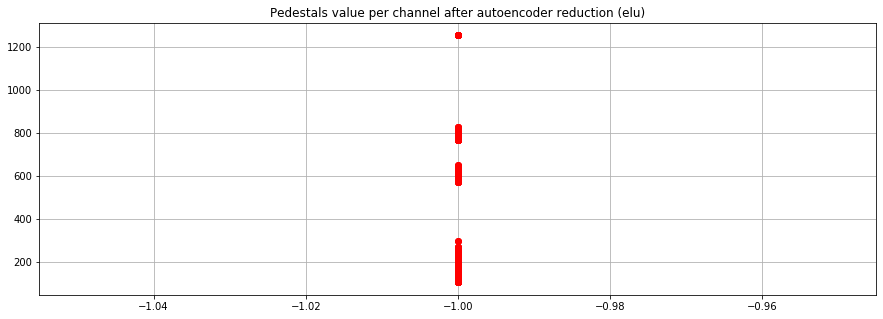

In [15]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (elu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [16]:
ncol = 84
model4 = Sequential()

# Encoder Layers
model4.add(Dense(64, activation = 'selu', input_shape=(ncol,)))
model4.add(Dense(44, activation = 'selu'))
model4.add(Dense(24, activation = 'selu'))
model4.add(Dense(14, activation = 'selu'))
model4.add(Dense(8 , activation = 'selu'))
model4.add(Dense(4 , activation = 'selu'))
model4.add(Dense(2 , activation = 'selu', name="bottleneck"))

# Decoder Layers
model4.add(Dense(4 , activation = 'selu'))
model4.add(Dense(8 , activation = 'selu'))
model4.add(Dense(14, activation = 'selu'))
model4.add(Dense(24, activation = 'selu'))
model4.add(Dense(44, activation = 'selu'))
model4.add(Dense(64, activation = 'selu'))
model4.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model4.compile(loss = 'mean_squared_error', optimizer = Adam())

model4.summary()

W0624 14:18:49.647706 12676 deprecation.py:323] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_41 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_42 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_43 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [17]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model4.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 7s 3ms/step - loss: 1888.0244
Epoch 2/10
2304/2304 [==============================] - 0s 93us/step - loss: 1875.0074
Epoch 3/10
2304/2304 [==============================] - 0s 98us/step - loss: 1871.8951
Epoch 4/10
2304/2304 [==============================] - 0s 104us/step - loss: 1871.7636
Epoch 5/10
2304/2304 [==============================] - 0s 88us/step - loss: 1871.7510 0s - loss: 1824.
Epoch 6/10
2304/2304 [==============================] - 0s 96us/step - loss: 1871.7473
Epoch 7/10
2304/2304 [==============================] - 0s 95us/step - loss: 1871.7452
Epoch 8/10
2304/2304 [==============================] - 0s 108us/step - loss: 1871.7436
Epoch 9/10
2304/2304 [==============================] - 0s 102us/step - loss: 1871.7425
Epoch 10/10
2304/2304 [==============================] - 0s 108us/step - loss: 1871.7415
Epoch 1/10
2304/2304 [==============================] - 0s 49us/step - loss: 1872.4414
Epoch 2/10
2304/2304 [

2304/2304 [==============================] - 0s 58us/step - loss: 1876.6793
Epoch 5/10
2304/2304 [==============================] - 0s 57us/step - loss: 1876.6792
Epoch 6/10
2304/2304 [==============================] - 0s 54us/step - loss: 1876.6793
Epoch 7/10
2304/2304 [==============================] - 0s 58us/step - loss: 1876.6793
Epoch 8/10
2304/2304 [==============================] - 0s 61us/step - loss: 1876.6793
Epoch 9/10
2304/2304 [==============================] - 0s 56us/step - loss: 1876.6793
Epoch 10/10
2304/2304 [==============================] - 0s 60us/step - loss: 1876.6793
Epoch 1/10
2304/2304 [==============================] - 0s 95us/step - loss: 1878.1456
Epoch 2/10
2304/2304 [==============================] - 0s 102us/step - loss: 1878.1456
Epoch 3/10
2304/2304 [==============================] - 0s 115us/step - loss: 1878.1456
Epoch 4/10
2304/2304 [==============================] - 0s 100us/step - loss: 1878.1456
Epoch 5/10
2304/2304 [============================

2304/2304 [==============================] - 0s 79us/step - loss: 1884.6306
Epoch 8/10
2304/2304 [==============================] - 0s 82us/step - loss: 1884.6306
Epoch 9/10
2304/2304 [==============================] - 0s 83us/step - loss: 1884.6306
Epoch 10/10
2304/2304 [==============================] - 0s 118us/step - loss: 1884.6306
Epoch 1/10
2304/2304 [==============================] - 0s 90us/step - loss: 1883.7402
Epoch 2/10
2304/2304 [==============================] - 0s 102us/step - loss: 1883.7402
Epoch 3/10
2304/2304 [==============================] - 0s 99us/step - loss: 1883.7403
Epoch 4/10
2304/2304 [==============================] - 0s 98us/step - loss: 1883.7403
Epoch 5/10
2304/2304 [==============================] - 0s 108us/step - loss: 1883.74020s - loss: 1923.
Epoch 6/10
2304/2304 [==============================] - 0s 106us/step - loss: 1883.7402
Epoch 7/10
2304/2304 [==============================] - 0s 99us/step - loss: 1883.7402
Epoch 8/10
2304/2304 [===========

2304/2304 [==============================] - 0s 79us/step - loss: 1889.3385
Epoch 1/10
2304/2304 [==============================] - 0s 56us/step - loss: 1889.5919
Epoch 2/10
2304/2304 [==============================] - 0s 52us/step - loss: 1889.5919
Epoch 3/10
2304/2304 [==============================] - 0s 55us/step - loss: 1889.5919
Epoch 4/10
2304/2304 [==============================] - 0s 59us/step - loss: 1889.5919
Epoch 5/10
2304/2304 [==============================] - 0s 54us/step - loss: 1889.5918
Epoch 6/10
2304/2304 [==============================] - 0s 56us/step - loss: 1889.5919
Epoch 7/10
2304/2304 [==============================] - 0s 55us/step - loss: 1889.5919
Epoch 8/10
2304/2304 [==============================] - 0s 56us/step - loss: 1889.5918
Epoch 9/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5919
Epoch 10/10
2304/2304 [==============================] - 0s 46us/step - loss: 1889.5919
Epoch 1/10
2304/2304 [==============================]

2304/2304 [==============================] - 0s 58us/step - loss: 1893.7683
Epoch 4/10
2304/2304 [==============================] - 0s 98us/step - loss: 1893.7683
Epoch 5/10
2304/2304 [==============================] - 0s 105us/step - loss: 1893.7683
Epoch 6/10
2304/2304 [==============================] - 0s 77us/step - loss: 1893.7683
Epoch 7/10
2304/2304 [==============================] - 0s 105us/step - loss: 1893.7683
Epoch 8/10
2304/2304 [==============================] - 0s 96us/step - loss: 1893.7683
Epoch 9/10
2304/2304 [==============================] - 0s 88us/step - loss: 1893.7683
Epoch 10/10
2304/2304 [==============================] - 0s 82us/step - loss: 1893.7683
Epoch 1/10
2304/2304 [==============================] - ETA: 0s - loss: 1852.07 - 0s 105us/step - loss: 1894.6123
Epoch 2/10
2304/2304 [==============================] - 0s 113us/step - loss: 1894.6123
Epoch 3/10
2304/2304 [==============================] - 0s 116us/step - loss: 1894.6122
Epoch 4/10
2304/2304 [

In [18]:
chanell_encoder = Model(model4.input, model4.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_41 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_42 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_43 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 36        
__________

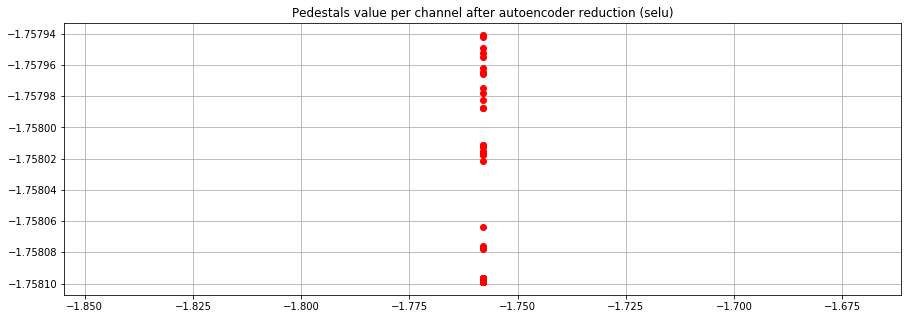

In [19]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (selu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [20]:
ncol = 84
model5 = Sequential()

# Encoder Layers
model5.add(Dense(64, activation = 'tanh', input_shape=(ncol,)))
model5.add(Dense(44, activation = 'tanh'))
model5.add(Dense(24, activation = 'tanh'))
model5.add(Dense(14, activation = 'tanh'))
model5.add(Dense(8 , activation = 'tanh'))
model5.add(Dense(4 , activation = 'tanh'))
model5.add(Dense(2 , activation = 'tanh', name="bottleneck"))

# Decoder Layers
model5.add(Dense(4 , activation = 'tanh'))
model5.add(Dense(8 , activation = 'tanh'))
model5.add(Dense(14, activation = 'tanh'))
model5.add(Dense(24, activation = 'tanh'))
model5.add(Dense(44, activation = 'tanh'))
model5.add(Dense(64, activation = 'tanh'))
model5.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model5.compile(loss = 'mean_squared_error', optimizer = Adam())

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_54 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_55 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_56 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_57 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [21]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model5.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 2s 884us/step - loss: 1893.9492
Epoch 2/10
2304/2304 [==============================] - 0s 46us/step - loss: 1884.9975
Epoch 3/10
2304/2304 [==============================] - 0s 46us/step - loss: 1875.6176
Epoch 4/10
2304/2304 [==============================] - 0s 50us/step - loss: 1872.9854
Epoch 5/10
2304/2304 [==============================] - 0s 46us/step - loss: 1872.4000
Epoch 6/10
2304/2304 [==============================] - 0s 49us/step - loss: 1872.1890
Epoch 7/10
2304/2304 [==============================] - 0s 47us/step - loss: 1872.0854
Epoch 8/10
2304/2304 [==============================] - 0s 49us/step - loss: 1872.0188
Epoch 9/10
2304/2304 [==============================] - 0s 45us/step - loss: 1871.9717
Epoch 10/10
2304/2304 [==============================] - 0s 43us/step - loss: 1871.9368
Epoch 1/10
2304/2304 [==============================] - 0s 45us/step - loss: 1872.6101
Epoch 2/10
2304/2304 [===================

2304/2304 [==============================] - 0s 41us/step - loss: 1876.6843
Epoch 5/10
2304/2304 [==============================] - 0s 43us/step - loss: 1876.6842
Epoch 6/10
2304/2304 [==============================] - 0s 40us/step - loss: 1876.6840
Epoch 7/10
2304/2304 [==============================] - 0s 46us/step - loss: 1876.6840
Epoch 8/10
2304/2304 [==============================] - 0s 42us/step - loss: 1876.6838
Epoch 9/10
2304/2304 [==============================] - 0s 41us/step - loss: 1876.6838
Epoch 10/10
2304/2304 [==============================] - 0s 43us/step - loss: 1876.6837
Epoch 1/10
2304/2304 [==============================] - 0s 43us/step - loss: 1878.1499
Epoch 2/10
2304/2304 [==============================] - 0s 39us/step - loss: 1878.1498
Epoch 3/10
2304/2304 [==============================] - 0s 69us/step - loss: 1878.1497
Epoch 4/10
2304/2304 [==============================] - 0s 62us/step - loss: 1878.1496
Epoch 5/10
2304/2304 [==============================]

Epoch 8/10
2304/2304 [==============================] - 0s 50us/step - loss: 1884.6314
Epoch 9/10
2304/2304 [==============================] - 0s 57us/step - loss: 1884.6314
Epoch 10/10
2304/2304 [==============================] - 0s 51us/step - loss: 1884.6313
Epoch 1/10
2304/2304 [==============================] - 0s 100us/step - loss: 1883.7410
Epoch 2/10
2304/2304 [==============================] - 0s 71us/step - loss: 1883.7410
Epoch 3/10
2304/2304 [==============================] - 0s 79us/step - loss: 1883.7410
Epoch 4/10
2304/2304 [==============================] - 0s 80us/step - loss: 1883.7410
Epoch 5/10
2304/2304 [==============================] - 0s 95us/step - loss: 1883.7410
Epoch 6/10
2304/2304 [==============================] - 0s 130us/step - loss: 1883.7410
Epoch 7/10
2304/2304 [==============================] - 0s 144us/step - loss: 1883.74090s - loss: 182
Epoch 8/10
2304/2304 [==============================] - 0s 90us/step - loss: 1883.7409
Epoch 9/10
2304/2304 [===

2304/2304 [==============================] - 0s 95us/step - loss: 1889.5923
Epoch 2/10
2304/2304 [==============================] - 0s 74us/step - loss: 1889.5922
Epoch 3/10
2304/2304 [==============================] - 0s 107us/step - loss: 1889.5922
Epoch 4/10
2304/2304 [==============================] - 0s 107us/step - loss: 1889.5923
Epoch 5/10
2304/2304 [==============================] - 0s 77us/step - loss: 1889.5922
Epoch 6/10
2304/2304 [==============================] - 0s 75us/step - loss: 1889.5922
Epoch 7/10
2304/2304 [==============================] - 0s 98us/step - loss: 1889.5922
Epoch 8/10
2304/2304 [==============================] - 0s 54us/step - loss: 1889.5922
Epoch 9/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5922
Epoch 10/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5922
Epoch 1/10
2304/2304 [==============================] - 0s 71us/step - loss: 1889.8678
Epoch 2/10
2304/2304 [=============================

2304/2304 [==============================] - 0s 41us/step - loss: 1893.7683
Epoch 5/10
2304/2304 [==============================] - 0s 40us/step - loss: 1893.7683
Epoch 6/10
2304/2304 [==============================] - 0s 40us/step - loss: 1893.7683
Epoch 7/10
2304/2304 [==============================] - 0s 42us/step - loss: 1893.7683
Epoch 8/10
2304/2304 [==============================] - 0s 40us/step - loss: 1893.7683
Epoch 9/10
2304/2304 [==============================] - 0s 39us/step - loss: 1893.7683
Epoch 10/10
2304/2304 [==============================] - 0s 42us/step - loss: 1893.7683
Epoch 1/10
2304/2304 [==============================] - 0s 69us/step - loss: 1894.6123
Epoch 2/10
2304/2304 [==============================] - 0s 56us/step - loss: 1894.6123
Epoch 3/10
2304/2304 [==============================] - 0s 86us/step - loss: 1894.6123
Epoch 4/10
2304/2304 [==============================] - 0s 76us/step - loss: 1894.6123
Epoch 5/10
2304/2304 [==============================]

In [22]:
chanell_encoder = Model(model5.input, model5.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_54 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_55 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_56 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_57 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 36        
__________

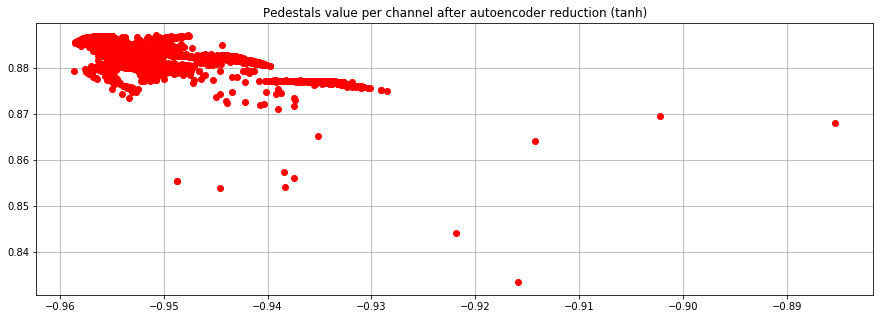

In [23]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (tanh)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [24]:
ncol = 84
model6 = Sequential()

# Encoder Layers
model6.add(Dense(64, activation = 'sigmoid', input_shape=(ncol,)))
model6.add(Dense(44, activation = 'sigmoid'))
model6.add(Dense(24, activation = 'sigmoid'))
model6.add(Dense(14, activation = 'sigmoid'))
model6.add(Dense(8 , activation = 'sigmoid'))
model6.add(Dense(4 , activation = 'sigmoid'))
model6.add(Dense(2 , activation = 'sigmoid', name="bottleneck"))

# Decoder Layers
model6.add(Dense(4 , activation = 'sigmoid'))
model6.add(Dense(8 , activation = 'sigmoid'))
model6.add(Dense(14, activation = 'sigmoid'))
model6.add(Dense(24, activation = 'sigmoid'))
model6.add(Dense(44, activation = 'sigmoid'))
model6.add(Dense(64, activation = 'sigmoid'))
model6.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model6.compile(loss = 'mean_squared_error', optimizer = Adam())

model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_67 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_68 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_69 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [25]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model6.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 7s 3ms/step - loss: 1892.8920
Epoch 2/10
2304/2304 [==============================] - 0s 48us/step - loss: 1885.3647
Epoch 3/10
2304/2304 [==============================] - 0s 45us/step - loss: 1878.5764
Epoch 4/10
2304/2304 [==============================] - 0s 49us/step - loss: 1874.7889
Epoch 5/10
2304/2304 [==============================] - 0s 49us/step - loss: 1873.2617
Epoch 6/10
2304/2304 [==============================] - 0s 47us/step - loss: 1872.6788
Epoch 7/10
2304/2304 [==============================] - 0s 49us/step - loss: 1872.4138
Epoch 8/10
2304/2304 [==============================] - 0s 46us/step - loss: 1872.2610
Epoch 9/10
2304/2304 [==============================] - 0s 46us/step - loss: 1872.1613
Epoch 10/10
2304/2304 [==============================] - 0s 49us/step - loss: 1872.0913
Epoch 1/10
2304/2304 [==============================] - 0s 83us/step - loss: 1872.7399
Epoch 2/10
2304/2304 [=====================

2304/2304 [==============================] - 0s 109us/step - loss: 1876.6887
Epoch 5/10
2304/2304 [==============================] - 0s 81us/step - loss: 1876.6885
Epoch 6/10
2304/2304 [==============================] - 0s 96us/step - loss: 1876.6883
Epoch 7/10
2304/2304 [==============================] - 0s 103us/step - loss: 1876.6881
Epoch 8/10
2304/2304 [==============================] - 0s 94us/step - loss: 1876.6879
Epoch 9/10
2304/2304 [==============================] - 0s 95us/step - loss: 1876.6878
Epoch 10/10
2304/2304 [==============================] - 0s 83us/step - loss: 1876.6876
Epoch 1/10
2304/2304 [==============================] - 0s 85us/step - loss: 1878.1538
Epoch 2/10
2304/2304 [==============================] - 0s 91us/step - loss: 1878.1536
Epoch 3/10
2304/2304 [==============================] - 0s 77us/step - loss: 1878.1535
Epoch 4/10
2304/2304 [==============================] - 0s 101us/step - loss: 1878.1534
Epoch 5/10
2304/2304 [============================

2304/2304 [==============================] - 0s 66us/step - loss: 1884.6321
Epoch 8/10
2304/2304 [==============================] - 0s 84us/step - loss: 1884.6320
Epoch 9/10
2304/2304 [==============================] - 0s 79us/step - loss: 1884.6319
Epoch 10/10
2304/2304 [==============================] - 0s 95us/step - loss: 1884.6319
Epoch 1/10
2304/2304 [==============================] - 0s 45us/step - loss: 1883.7416
Epoch 2/10
2304/2304 [==============================] - 0s 44us/step - loss: 1883.7415
Epoch 3/10
2304/2304 [==============================] - 0s 46us/step - loss: 1883.7415
Epoch 4/10
2304/2304 [==============================] - 0s 62us/step - loss: 1883.7416 0s - loss: 1883.53
Epoch 5/10
2304/2304 [==============================] - 0s 50us/step - loss: 1883.7415
Epoch 6/10
2304/2304 [==============================] - 0s 54us/step - loss: 1883.7415
Epoch 7/10
2304/2304 [==============================] - 0s 45us/step - loss: 1883.7414
Epoch 8/10
2304/2304 [============

2304/2304 [==============================] - 0s 47us/step - loss: 1889.3390
Epoch 1/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5924
Epoch 2/10
2304/2304 [==============================] - 0s 46us/step - loss: 1889.5924
Epoch 3/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5924
Epoch 4/10
2304/2304 [==============================] - 0s 46us/step - loss: 1889.5924
Epoch 5/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5924
Epoch 6/10
2304/2304 [==============================] - 0s 52us/step - loss: 1889.5924
Epoch 7/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5924
Epoch 8/10
2304/2304 [==============================] - 0s 54us/step - loss: 1889.5924
Epoch 9/10
2304/2304 [==============================] - 0s 49us/step - loss: 1889.5924
Epoch 10/10
2304/2304 [==============================] - 0s 47us/step - loss: 1889.5923
Epoch 1/10
2304/2304 [==============================]

2304/2304 [==============================] - 0s 43us/step - loss: 1893.7686
Epoch 4/10
2304/2304 [==============================] - 0s 46us/step - loss: 1893.7686
Epoch 5/10
2304/2304 [==============================] - 0s 43us/step - loss: 1893.7685
Epoch 6/10
2304/2304 [==============================] - 0s 44us/step - loss: 1893.7686
Epoch 7/10
2304/2304 [==============================] - 0s 49us/step - loss: 1893.7686
Epoch 8/10
2304/2304 [==============================] - 0s 49us/step - loss: 1893.7686
Epoch 9/10
2304/2304 [==============================] - 0s 56us/step - loss: 1893.7686
Epoch 10/10
2304/2304 [==============================] - 0s 52us/step - loss: 1893.7685
Epoch 1/10
2304/2304 [==============================] - 0s 43us/step - loss: 1894.6125
Epoch 2/10
2304/2304 [==============================] - 0s 43us/step - loss: 1894.6125
Epoch 3/10
2304/2304 [==============================] - 0s 44us/step - loss: 1894.6125
Epoch 4/10
2304/2304 [==============================]

In [26]:
chanell_encoder = Model(model6.input, model6.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_67 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_68 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_69 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 36        
__________

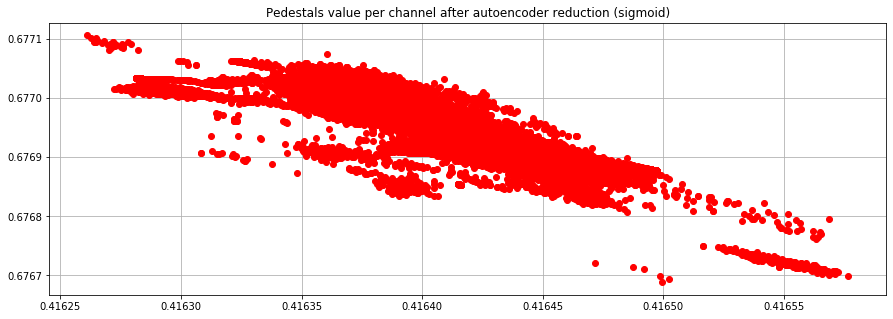

In [27]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (sigmoid)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [28]:
ncol = 84
model7 = Sequential()

# Encoder Layers
model7.add(Dense(64, activation = 'exponential', input_shape=(ncol,)))
model7.add(Dense(44, activation = 'exponential'))
model7.add(Dense(24, activation = 'exponential'))
model7.add(Dense(14, activation = 'exponential'))
model7.add(Dense(8 , activation = 'exponential'))
model7.add(Dense(4 , activation = 'exponential'))
model7.add(Dense(2 , activation = 'exponential', name="bottleneck"))

# Decoder Layers
model7.add(Dense(4 , activation = 'exponential'))
model7.add(Dense(8 , activation = 'exponential'))
model7.add(Dense(14, activation = 'exponential'))
model7.add(Dense(24, activation = 'exponential'))
model7.add(Dense(44, activation = 'exponential'))
model7.add(Dense(64, activation = 'exponential'))
model7.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model7.compile(loss = 'mean_squared_error', optimizer = Adam())

model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_80 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_81 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_82 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [29]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model7.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 6s 3ms/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 113us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 79us/step - loss: nan
Epoch 4/10
2304/2304 [==============================] - 0s 86us/step - loss: nan
Epoch 5/10
2304/2304 [==============================] - 0s 87us/step - loss: nan
Epoch 6/10
2304/2304 [==============================] - 0s 82us/step - loss: nan
Epoch 7/10
2304/2304 [==============================] - 0s 106us/step - loss: nan
Epoch 8/10
2304/2304 [==============================] - 0s 95us/step - loss: nan
Epoch 9/10
2304/2304 [==============================] - 0s 101us/step - loss: nan
Epoch 10/10
2304/2304 [==============================] - 0s 82us/step - loss: nan
Epoch 1/10
2304/2304 [==============================] - 0s 53us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 65us/step - loss: nan
Epoch 3/10
2304/2304 [===

2304/2304 [==============================] - 0s 109us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 98us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 84us/step - loss: nan
Epoch 4/10
2304/2304 [==============================] - 0s 84us/step - loss: nan
Epoch 5/10
2304/2304 [==============================] - 0s 100us/step - loss: nan
Epoch 6/10
2304/2304 [==============================] - 0s 87us/step - loss: nan
Epoch 7/10
2304/2304 [==============================] - 0s 82us/step - loss: nan
Epoch 8/10
2304/2304 [==============================] - 0s 92us/step - loss: nan
Epoch 9/10
2304/2304 [==============================] - 0s 87us/step - loss: nan
Epoch 10/10
2304/2304 [==============================] - 0s 88us/step - loss: nan
Epoch 1/10
2304/2304 [==============================] - 0s 105us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 59us/step - loss: nan
Epoch 3/10
2304/2304 [=============

Epoch 2/10
2304/2304 [==============================] - 0s 49us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 50us/step - loss: nan
Epoch 4/10
2304/2304 [==============================] - 0s 44us/step - loss: nan
Epoch 5/10
2304/2304 [==============================] - 0s 46us/step - loss: nan
Epoch 6/10
2304/2304 [==============================] - 0s 45us/step - loss: nan
Epoch 7/10
2304/2304 [==============================] - 0s 46us/step - loss: nan
Epoch 8/10
2304/2304 [==============================] - 0s 53us/step - loss: nan
Epoch 9/10
2304/2304 [==============================] - 0s 49us/step - loss: nan
Epoch 10/10
2304/2304 [==============================] - 0s 53us/step - loss: nan
Epoch 1/10
2304/2304 [==============================] - 0s 86us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 75us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 92us/step - loss: nan
Epoch 4/10
2304/2304 [=====

2304/2304 [==============================] - 0s 46us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 47us/step - loss: nan
Epoch 4/10
2304/2304 [==============================] - 0s 56us/step - loss: nan
Epoch 5/10
2304/2304 [==============================] - 0s 53us/step - loss: nan
Epoch 6/10
2304/2304 [==============================] - 0s 60us/step - loss: nan
Epoch 7/10
2304/2304 [==============================] - 0s 53us/step - loss: nan
Epoch 8/10
2304/2304 [==============================] - 0s 62us/step - loss: nan
Epoch 9/10
2304/2304 [==============================] - 0s 57us/step - loss: nan
Epoch 10/10
2304/2304 [==============================] - 0s 57us/step - loss: nan
Epoch 1/10
2304/2304 [==============================] - 0s 103us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 108us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 94us/step - loss: nan
Epoch 4/10
2304/2304 [==============

2304/2304 [==============================] - 0s 96us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 89us/step - loss: nan
Epoch 4/10
2304/2304 [==============================] - 0s 95us/step - loss: nan
Epoch 5/10
2304/2304 [==============================] - 0s 96us/step - loss: nan
Epoch 6/10
2304/2304 [==============================] - 0s 97us/step - loss: nan
Epoch 7/10
2304/2304 [==============================] - 0s 92us/step - loss: nan
Epoch 8/10
2304/2304 [==============================] - 0s 84us/step - loss: nan
Epoch 9/10
2304/2304 [==============================] - 0s 92us/step - loss: nan
Epoch 10/10
2304/2304 [==============================] - 0s 95us/step - loss: nan
Epoch 1/10
2304/2304 [==============================] - 0s 55us/step - loss: nan
Epoch 2/10
2304/2304 [==============================] - 0s 65us/step - loss: nan
Epoch 3/10
2304/2304 [==============================] - 0s 59us/step - loss: nan
Epoch 4/10
2304/2304 [================

In [30]:
chanell_encoder = Model(model7.input, model7.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_80 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_81 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_82 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
__________

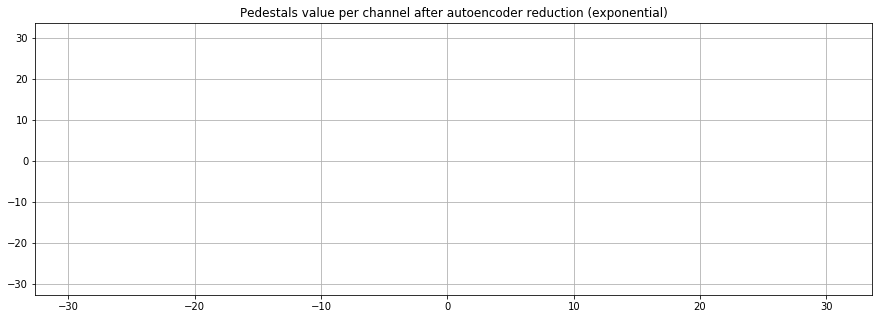

In [31]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (exponential)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [32]:
ncol = 84
model8 = Sequential()

# Encoder Layers
model8.add(Dense(64, activation = 'linear', input_shape=(ncol,)))
model8.add(Dense(44, activation = 'linear'))
model8.add(Dense(24, activation = 'linear'))
model8.add(Dense(14, activation = 'linear'))
model8.add(Dense(8 , activation = 'linear'))
model8.add(Dense(4 , activation = 'linear'))
model8.add(Dense(2 , activation = 'linear', name="bottleneck"))

# Decoder Layers
model8.add(Dense(4 , activation = 'linear'))
model8.add(Dense(8 , activation = 'linear'))
model8.add(Dense(14, activation = 'linear'))
model8.add(Dense(24, activation = 'linear'))
model8.add(Dense(44, activation = 'linear'))
model8.add(Dense(64, activation = 'linear'))
model8.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model8.compile(loss = 'mean_squared_error', optimizer = Adam())

model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_93 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_94 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_95 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [33]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2.T
    
    model8.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2304/2304 [==============================] - 5s 2ms/step - loss: 1887.7184
Epoch 2/10
2304/2304 [==============================] - 0s 64us/step - loss: 1883.4043
Epoch 3/10
2304/2304 [==============================] - 0s 68us/step - loss: 1883.0703
Epoch 4/10
2304/2304 [==============================] - 0s 68us/step - loss: 1883.0597
Epoch 5/10
2304/2304 [==============================] - 0s 70us/step - loss: 1882.4531
Epoch 6/10
2304/2304 [==============================] - 0s 76us/step - loss: 1881.9560
Epoch 7/10
2304/2304 [==============================] - 0s 73us/step - loss: 1881.9559
Epoch 8/10
2304/2304 [==============================] - 0s 67us/step - loss: 1881.9559
Epoch 9/10
2304/2304 [==============================] - 0s 81us/step - loss: 1881.9560
Epoch 10/10
2304/2304 [==============================] - 0s 75us/step - loss: 1881.9560
Epoch 1/10
2304/2304 [==============================] - 0s 79us/step - loss: 1882.6447
Epoch 2/10
2304/2304 [=====================

2304/2304 [==============================] - 0s 72us/step - loss: 1886.8334
Epoch 5/10
2304/2304 [==============================] - 0s 70us/step - loss: 1886.8334
Epoch 6/10
2304/2304 [==============================] - 0s 68us/step - loss: 1886.8334
Epoch 7/10
2304/2304 [==============================] - 0s 70us/step - loss: 1886.8334
Epoch 8/10
2304/2304 [==============================] - 0s 63us/step - loss: 1886.8334
Epoch 9/10
2304/2304 [==============================] - 0s 66us/step - loss: 1886.8334
Epoch 10/10
2304/2304 [==============================] - 0s 66us/step - loss: 1886.8335
Epoch 1/10
2304/2304 [==============================] - 0s 65us/step - loss: 1888.2709
Epoch 2/10
2304/2304 [==============================] - 0s 66us/step - loss: 1888.2709
Epoch 3/10
2304/2304 [==============================] - 0s 64us/step - loss: 1888.2709
Epoch 4/10
2304/2304 [==============================] - 0s 63us/step - loss: 1888.2709
Epoch 5/10
2304/2304 [==============================]

Epoch 8/10
2304/2304 [==============================] - 0s 71us/step - loss: 1894.9303
Epoch 9/10
2304/2304 [==============================] - 0s 62us/step - loss: 1894.9303
Epoch 10/10
2304/2304 [==============================] - 0s 61us/step - loss: 1894.9303
Epoch 1/10
2304/2304 [==============================] - 0s 59us/step - loss: 1894.0283
Epoch 2/10
2304/2304 [==============================] - 0s 54us/step - loss: 1894.0283
Epoch 3/10
2304/2304 [==============================] - 0s 61us/step - loss: 1894.0283
Epoch 4/10
2304/2304 [==============================] - 0s 83us/step - loss: 1894.0283
Epoch 5/10
2304/2304 [==============================] - 0s 84us/step - loss: 1894.0283
Epoch 6/10
2304/2304 [==============================] - 0s 55us/step - loss: 1894.0283
Epoch 7/10
2304/2304 [==============================] - 0s 64us/step - loss: 1894.0283
Epoch 8/10
2304/2304 [==============================] - 0s 59us/step - loss: 1894.0283
Epoch 9/10
2304/2304 [====================

2304/2304 [==============================] - 0s 67us/step - loss: 1899.8686
Epoch 2/10
2304/2304 [==============================] - 0s 66us/step - loss: 1899.8686
Epoch 3/10
2304/2304 [==============================] - 0s 64us/step - loss: 1899.8686
Epoch 4/10
2304/2304 [==============================] - 0s 67us/step - loss: 1899.8686
Epoch 5/10
2304/2304 [==============================] - 0s 66us/step - loss: 1899.8686
Epoch 6/10
2304/2304 [==============================] - 0s 66us/step - loss: 1899.8686
Epoch 7/10
2304/2304 [==============================] - 0s 60us/step - loss: 1899.8686
Epoch 8/10
2304/2304 [==============================] - 0s 65us/step - loss: 1899.8686
Epoch 9/10
2304/2304 [==============================] - 0s 60us/step - loss: 1899.8686
Epoch 10/10
2304/2304 [==============================] - 0s 71us/step - loss: 1899.8686
Epoch 1/10
2304/2304 [==============================] - 0s 62us/step - loss: 1900.1652
Epoch 2/10
2304/2304 [==============================]

2304/2304 [==============================] - 0s 65us/step - loss: 1904.0993
Epoch 5/10
2304/2304 [==============================] - 0s 64us/step - loss: 1904.0994
Epoch 6/10
2304/2304 [==============================] - 0s 62us/step - loss: 1904.0994
Epoch 7/10
2304/2304 [==============================] - 0s 64us/step - loss: 1904.0993
Epoch 8/10
2304/2304 [==============================] - 0s 66us/step - loss: 1904.0994
Epoch 9/10
2304/2304 [==============================] - 0s 68us/step - loss: 1904.0994
Epoch 10/10
2304/2304 [==============================] - 0s 62us/step - loss: 1904.0994
Epoch 1/10
2304/2304 [==============================] - 0s 85us/step - loss: 1904.9760
Epoch 2/10
2304/2304 [==============================] - 0s 116us/step - loss: 1904.9760
Epoch 3/10
2304/2304 [==============================] - 0s 94us/step - loss: 1904.9760
Epoch 4/10
2304/2304 [==============================] - 0s 116us/step - loss: 1904.9760
Epoch 5/10
2304/2304 [=============================

In [34]:
chanell_encoder = Model(model8.input, model8.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_93 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_94 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_95 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 36        
__________

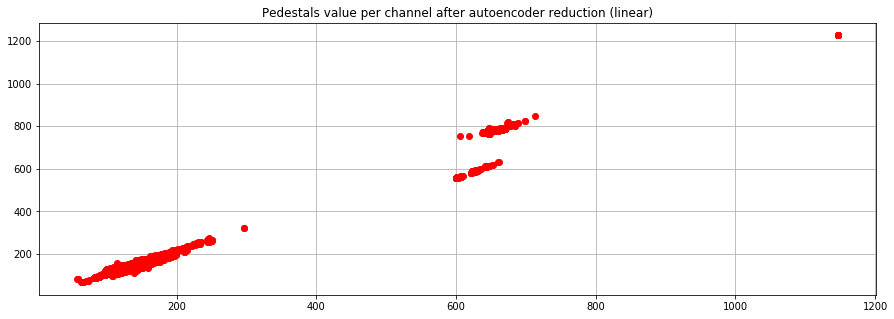

In [35]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (linear)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [36]:
ncol = 2304
model9 = Sequential()

# Encoder Layers
model9.add(Dense(2000, activation = 'elu', input_shape=(ncol,)))
model9.add(Dense(1750, activation = 'elu'))
model9.add(Dense(1500, activation = 'elu'))
model9.add(Dense(1250, activation = 'elu'))
model9.add(Dense(1000, activation = 'elu'))
model9.add(Dense(750 , activation = 'elu'))
model9.add(Dense(500 , activation = 'elu'))
model9.add(Dense(250 , activation = 'elu'))
model9.add(Dense(100 , activation = 'elu'))
model9.add(Dense(50  , activation = 'elu'))
model9.add(Dense(20  , activation = 'elu'))
model9.add(Dense(2   , activation = 'elu', name="bottleneck"))

# Decoder Layers
model9.add(Dense(20  , activation = 'elu'))
model9.add(Dense(50  , activation = 'elu'))
model9.add(Dense(100 , activation = 'elu'))
model9.add(Dense(250 , activation = 'elu'))
model9.add(Dense(500 , activation = 'elu'))
model9.add(Dense(750 , activation = 'elu'))
model9.add(Dense(1000, activation = 'elu'))
model9.add(Dense(1250, activation = 'elu'))
model9.add(Dense(1500, activation = 'elu'))
model9.add(Dense(1750, activation = 'elu'))
model9.add(Dense(2000, activation = 'elu'))
model9.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model9.compile(loss = 'mean_squared_error', optimizer = Adam())

model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_106 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_107 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_108 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_109 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_110 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_111 (Dense)            (None, 500)               375500    
__________

In [37]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model9.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 23s 273ms/step - loss: 1895.4417
Epoch 2/10
84/84 [==============================] - 3s 31ms/step - loss: 1890.5681
Epoch 3/10
84/84 [==============================] - 3s 31ms/step - loss: 1873.5596
Epoch 4/10
84/84 [==============================] - 2s 21ms/step - loss: 1871.9606
Epoch 5/10
84/84 [==============================] - 1s 18ms/step - loss: 1871.8069
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 1871.7880
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 1871.7362
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 1871.7362
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 1871.7365
Epoch 10/10
84/84 [==============================] - 1s 17ms/step - loss: 1871.7362
Epoch 1/10
84/84 [==============================] - 3s 30ms/step - loss: 1872.4368
Epoch 2/10
84/84 [==============================] - 2s 29ms/step - loss: 1872.4368
E

Epoch 10/10
84/84 [==============================] - 3s 32ms/step - loss: 1876.6791
Epoch 1/10
84/84 [==============================] - 3s 33ms/step - loss: 1878.1455
Epoch 2/10
84/84 [==============================] - 3s 33ms/step - loss: 1878.1456
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 4/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1455
Epoch 5/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 1878.1456
Epoch 10/10
84/84 [==============================] - 2s 27ms/step - loss: 1878.1455
Epoch 1/10
84/84 [==============================] - 3s 32ms/step - loss: 1879.1924
Ep

Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 1883.7404
Epoch 10/10
84/84 [==============================] - 2s 19ms/step - loss: 1883.7401
Epoch 1/10
84/84 [==============================] - 2s 18ms/step - loss: 1885.2286
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 1885.2286
Epoch 5/10
84/84 [==============================] - 2s 20ms/step - loss: 1885.2286
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2288
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Epoch 10/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Ep

Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.8674
Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.8674
Epoch 10/10
84/84 [==============================] - 2s 18ms/step - loss: 1889.8676
Epoch 1/10
84/84 [==============================] - 2s 21ms/step - loss: 1889.3021
Epoch 2/10
84/84 [==============================] - 2s 21ms/step - loss: 1889.3019
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.3021
Epoch 4/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.3021
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: 1889.3021
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.3021
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 1889.3021
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1889.3021
Epoch 9/10
84/84 [==============================] - 2s 20ms/step - loss: 1889.3021
Epo

Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 1894.8043
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1894.8041
Epoch 9/10
84/84 [==============================] - 2s 20ms/step - loss: 1894.8041
Epoch 10/10
84/84 [==============================] - 2s 20ms/step - loss: 1894.8043
Epoch 1/10
84/84 [==============================] - 3s 34ms/step - loss: 1894.3466
Epoch 2/10
84/84 [==============================] - 3s 33ms/step - loss: 1894.3466
Epoch 3/10
84/84 [==============================] - 2s 29ms/step - loss: 1894.3467
Epoch 4/10
84/84 [==============================] - 2s 20ms/step - loss: 1894.3463
Epoch 5/10
84/84 [==============================] - 2s 22ms/step - loss: 1894.3466
Epoch 6/10
84/84 [==============================] - 2s 20ms/step - loss: 1894.3466
Epoch 7/10
84/84 [==============================] - 2s 22ms/step - loss: 1894.3466
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1894.3466
Epo

In [38]:
module_encoder = Model(model9.input, model9.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_106 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_107 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_108 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_109 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_110 (Dense)            (None, 750)               750750    
__________

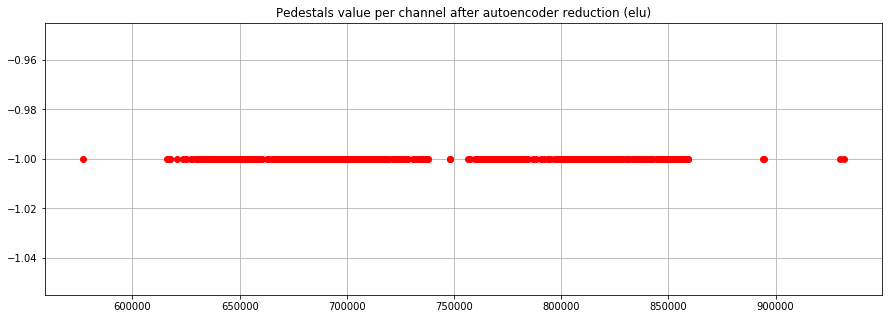

In [39]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (elu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [40]:
ncol = 2304
model10 = Sequential()

# Encoder Layers
model10.add(Dense(2000, activation = 'softmax', input_shape=(ncol,)))
model10.add(Dense(1750, activation = 'softmax'))
model10.add(Dense(1500, activation = 'softmax'))
model10.add(Dense(1250, activation = 'softmax'))
model10.add(Dense(1000, activation = 'softmax'))
model10.add(Dense(750 , activation = 'softmax'))
model10.add(Dense(500 , activation = 'softmax'))
model10.add(Dense(250 , activation = 'softmax'))
model10.add(Dense(100 , activation = 'softmax'))
model10.add(Dense(50  , activation = 'softmax'))
model10.add(Dense(20  , activation = 'softmax'))
model10.add(Dense(2   , activation = 'softmax', name="bottleneck"))

# Decoder Layers
model10.add(Dense(20  , activation = 'softmax'))
model10.add(Dense(50  , activation = 'softmax'))
model10.add(Dense(100 , activation = 'softmax'))
model10.add(Dense(250 , activation = 'softmax'))
model10.add(Dense(500 , activation = 'softmax'))
model10.add(Dense(750 , activation = 'softmax'))
model10.add(Dense(1000, activation = 'softmax'))
model10.add(Dense(1250, activation = 'softmax'))
model10.add(Dense(1500, activation = 'softmax'))
model10.add(Dense(1750, activation = 'softmax'))
model10.add(Dense(2000, activation = 'softmax'))
model10.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model10.compile(loss = 'mean_squared_error', optimizer = Adam())

model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_129 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_130 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_131 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_132 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_133 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_134 (Dense)            (None, 500)               375500    
__________

In [41]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model10.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 53s 634ms/step - loss: 1895.3771
Epoch 2/10
84/84 [==============================] - 5s 58ms/step - loss: 1895.3685
Epoch 3/10
84/84 [==============================] - 5s 62ms/step - loss: 1895.3505
Epoch 4/10
84/84 [==============================] - 5s 61ms/step - loss: 1895.3420
Epoch 5/10
84/84 [==============================] - 5s 54ms/step - loss: 1895.3246
Epoch 6/10
84/84 [==============================] - 5s 65ms/step - loss: 1895.3118
Epoch 7/10
84/84 [==============================] - 5s 61ms/step - loss: 1895.2961
Epoch 8/10
84/84 [==============================] - 5s 54ms/step - loss: 1895.2803
Epoch 9/10
84/84 [==============================] - 3s 39ms/step - loss: 1895.2623
Epoch 10/10
84/84 [==============================] - 3s 41ms/step - loss: 1895.2316
Epoch 1/10
84/84 [==============================] - 5s 63ms/step - loss: 1895.8953
Epoch 2/10
84/84 [==============================] - 5s 64ms/step - loss: 1895.8754
E

Epoch 10/10
84/84 [==============================] - 3s 35ms/step - loss: 1898.0365
Epoch 1/10
84/84 [==============================] - 5s 59ms/step - loss: 1899.4478
Epoch 2/10
84/84 [==============================] - 5s 57ms/step - loss: 1899.4194
Epoch 3/10
84/84 [==============================] - 4s 53ms/step - loss: 1899.4014
Epoch 4/10
84/84 [==============================] - 3s 42ms/step - loss: 1899.3815
Epoch 5/10
84/84 [==============================] - 3s 31ms/step - loss: 1899.3655
Epoch 6/10
84/84 [==============================] - 3s 31ms/step - loss: 1899.3469
Epoch 7/10
84/84 [==============================] - 2s 28ms/step - loss: 1899.3279
Epoch 8/10
84/84 [==============================] - 3s 32ms/step - loss: 1899.3004
Epoch 9/10
84/84 [==============================] - 3s 35ms/step - loss: 1899.2806
Epoch 10/10
84/84 [==============================] - 3s 31ms/step - loss: 1899.2589
Epoch 1/10
84/84 [==============================] - 5s 62ms/step - loss: 1900.3182
Ep

Epoch 9/10
84/84 [==============================] - 3s 35ms/step - loss: 1902.9041
Epoch 10/10
84/84 [==============================] - 3s 31ms/step - loss: 1902.8807
Epoch 1/10
84/84 [==============================] - 2s 21ms/step - loss: 1904.3925
Epoch 2/10
84/84 [==============================] - 2s 22ms/step - loss: 1904.3623
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 1904.3424
Epoch 4/10
84/84 [==============================] - 2s 19ms/step - loss: 1904.3154
Epoch 5/10
84/84 [==============================] - 2s 27ms/step - loss: 1904.3008
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 1904.2762
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 1904.2581
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 1904.2227
Epoch 9/10
84/84 [==============================] - 2s 21ms/step - loss: 1904.2000
Epoch 10/10
84/84 [==============================] - 2s 20ms/step - loss: 1904.1691
Ep

Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.9386
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.9159
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.9020
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 1906.2883
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.2717
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.2543
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 1906.2404
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.2241
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.2068
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.1907
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.1740
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1906.1577
Epo

Epoch 7/10
84/84 [==============================] - 2s 29ms/step - loss: 1909.9364
Epoch 8/10
84/84 [==============================] - 2s 28ms/step - loss: 1909.9169
Epoch 9/10
84/84 [==============================] - 2s 29ms/step - loss: 1909.8951
Epoch 10/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.8740
Epoch 1/10
84/84 [==============================] - 1s 18ms/step - loss: 1909.3779
Epoch 2/10
84/84 [==============================] - 2s 29ms/step - loss: 1909.3608
Epoch 3/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.3367
Epoch 4/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.3115
Epoch 5/10
84/84 [==============================] - 2s 28ms/step - loss: 1909.2900
Epoch 6/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.2699
Epoch 7/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.2543
Epoch 8/10
84/84 [==============================] - 2s 27ms/step - loss: 1909.2330
Epo

In [42]:
module_encoder = Model(model10.input, model10.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_128 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_129 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_130 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_131 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_132 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_133 (Dense)            (None, 750)               750750    
__________

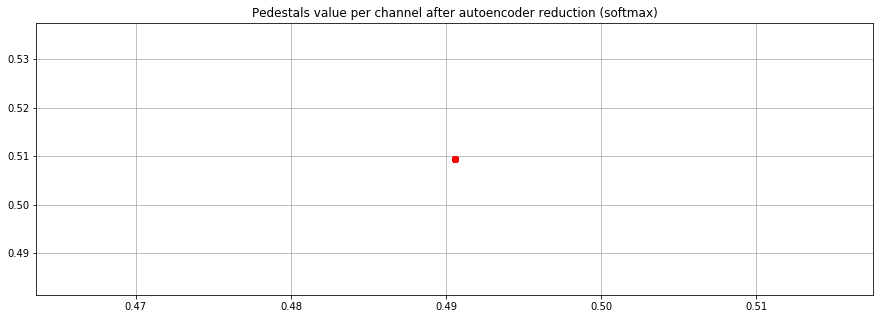

In [43]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (softmax)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [44]:
ncol = 2304
model11 = Sequential()

# Encoder Layers
model11.add(Dense(2000, activation = 'selu', input_shape=(ncol,)))
model11.add(Dense(1750, activation = 'selu'))
model11.add(Dense(1500, activation = 'selu'))
model11.add(Dense(1250, activation = 'selu'))
model11.add(Dense(1000, activation = 'selu'))
model11.add(Dense(750 , activation = 'selu'))
model11.add(Dense(500 , activation = 'selu'))
model11.add(Dense(250 , activation = 'selu'))
model11.add(Dense(100 , activation = 'selu'))
model11.add(Dense(50  , activation = 'selu'))
model11.add(Dense(20  , activation = 'selu'))
model11.add(Dense(2   , activation = 'selu', name="bottleneck"))

# Decoder Layers
model11.add(Dense(20  , activation = 'selu'))
model11.add(Dense(50  , activation = 'selu'))
model11.add(Dense(100 , activation = 'selu'))
model11.add(Dense(250 , activation = 'selu'))
model11.add(Dense(500 , activation = 'selu'))
model11.add(Dense(750 , activation = 'selu'))
model11.add(Dense(1000, activation = 'selu'))
model11.add(Dense(1250, activation = 'selu'))
model11.add(Dense(1500, activation = 'selu'))
model11.add(Dense(1750, activation = 'selu'))
model11.add(Dense(2000, activation = 'selu'))
model11.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model11.compile(loss = 'mean_squared_error', optimizer = Adam())

model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_152 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_153 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_154 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_155 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_156 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_157 (Dense)            (None, 500)               375500    
__________

In [45]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model11.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 19s 227ms/step - loss: 1895.2223
Epoch 2/10
84/84 [==============================] - 3s 30ms/step - loss: 1883.4885
Epoch 3/10
84/84 [==============================] - 3s 32ms/step - loss: 1873.7483
Epoch 4/10
84/84 [==============================] - 2s 28ms/step - loss: 1918.3973
Epoch 5/10
84/84 [==============================] - 2s 28ms/step - loss: 1915.6073
Epoch 6/10
84/84 [==============================] - 2s 28ms/step - loss: 1911.4056
Epoch 7/10
84/84 [==============================] - 2s 27ms/step - loss: 1899.9023
Epoch 8/10
84/84 [==============================] - 2s 27ms/step - loss: 1882.6531
Epoch 9/10
84/84 [==============================] - 2s 28ms/step - loss: 1873.5558
Epoch 10/10
84/84 [==============================] - 2s 25ms/step - loss: 1871.8480
Epoch 1/10
84/84 [==============================] - 2s 27ms/step - loss: 1872.5930
Epoch 2/10
84/84 [==============================] - 2s 26ms/step - loss: 1872.4658
E

Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 1876.7074
Epoch 1/10
84/84 [==============================] - 2s 27ms/step - loss: 1878.1736
Epoch 2/10
84/84 [==============================] - 2s 27ms/step - loss: 1878.1736
Epoch 3/10
84/84 [==============================] - 2s 27ms/step - loss: 1878.1733
Epoch 4/10
84/84 [==============================] - 2s 25ms/step - loss: 1878.1736
Epoch 5/10
84/84 [==============================] - 2s 26ms/step - loss: 1878.1736
Epoch 6/10
84/84 [==============================] - 2s 28ms/step - loss: 1878.1733
Epoch 7/10
84/84 [==============================] - 2s 28ms/step - loss: 1878.1736
Epoch 8/10
84/84 [==============================] - 1s 18ms/step - loss: 1878.1736
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 1878.1736
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1736
Epoch 1/10
84/84 [==============================] - 2s 27ms/step - loss: 1879.2205
Ep

Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 1883.7684
Epoch 10/10
84/84 [==============================] - 1s 17ms/step - loss: 1883.7682
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 1885.2567
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2567
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 1885.2571
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 1885.2568
Epoch 5/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2567
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 1885.2568
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 1885.2568
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 1885.2568
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1885.2568
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 1885.2567
Ep

Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.8956
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.8956
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.8956
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.3302
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 1889.3303
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.3302
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3302
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.3302
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 1889.3302
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3302
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3303
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3302
Epo

Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8326
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8326
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8328
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8328
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3748
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3748
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3750
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3748
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3746
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 1894.3748
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3748
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3748
Epo

In [46]:
module_encoder = Model(model11.input, model11.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_151 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_152 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_153 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_154 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_155 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_156 (Dense)            (None, 750)               750750    
__________

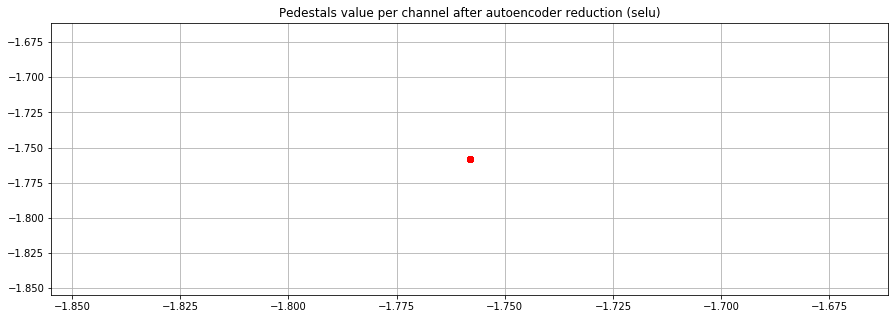

In [47]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (selu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [48]:
ncol = 2304
model12 = Sequential()

# Encoder Layers
model12.add(Dense(2000, activation = 'relu', input_shape=(ncol,)))
model12.add(Dense(1750, activation = 'relu'))
model12.add(Dense(1500, activation = 'relu'))
model12.add(Dense(1250, activation = 'relu'))
model12.add(Dense(1000, activation = 'relu'))
model12.add(Dense(750 , activation = 'relu'))
model12.add(Dense(500 , activation = 'relu'))
model12.add(Dense(250 , activation = 'relu'))
model12.add(Dense(100 , activation = 'relu'))
model12.add(Dense(50  , activation = 'relu'))
model12.add(Dense(20  , activation = 'relu'))
model12.add(Dense(2   , activation = 'relu', name="bottleneck"))

# Decoder Layers
model12.add(Dense(20  , activation = 'relu'))
model12.add(Dense(50  , activation = 'relu'))
model12.add(Dense(100 , activation = 'relu'))
model12.add(Dense(250 , activation = 'relu'))
model12.add(Dense(500 , activation = 'relu'))
model12.add(Dense(750 , activation = 'relu'))
model12.add(Dense(1000, activation = 'relu'))
model12.add(Dense(1250, activation = 'relu'))
model12.add(Dense(1500, activation = 'relu'))
model12.add(Dense(1750, activation = 'relu'))
model12.add(Dense(2000, activation = 'relu'))
model12.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model12.compile(loss = 'mean_squared_error', optimizer = Adam())

model12.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_175 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_176 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_177 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_178 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_179 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_180 (Dense)            (None, 500)               375500    
__________

In [49]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model12.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 7s 85ms/step - loss: 1895.3793
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 1891.0461
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 1873.4113
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1872.2197
Epoch 5/10
84/84 [==============================] - 1s 14ms/step - loss: 1871.8707
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7943
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7560
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1871.7465
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7365
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7362
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1872.4368
Epoch 2/10
84/84 [==============================] - 1s 12ms/step - loss: 1872.4368
Epo

Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1876.6793
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1456
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 1878.1455
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 1878.1456
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1878.1456
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1878.1456
Epoch 6/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1456
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1878.1455
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1878.1455
Epoch 9/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1456
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1878.1455
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1879.1924
Ep

Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1883.7401
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1883.7404
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 3/10
84/84 [==============================] - 1s 12ms/step - loss: 1885.2286
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 6/10
84/84 [==============================] - 1s 12ms/step - loss: 1885.2286
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 9/10
84/84 [==============================] - 1s 12ms/step - loss: 1885.2286
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Ep

Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.8676
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.8674
Epoch 10/10
84/84 [==============================] - 1s 12ms/step - loss: 1889.8674
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1889.3019
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3019
Epoch 4/10
84/84 [==============================] - 1s 12ms/step - loss: 1889.3022
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 7/10
84/84 [==============================] - 1s 12ms/step - loss: 1889.3021
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epo

Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.8043
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.8043
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8041
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8043
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3467
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epo

In [50]:
module_encoder = Model(model12.input, model12.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_174 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_175 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_176 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_177 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_178 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_179 (Dense)            (None, 750)               750750    
__________

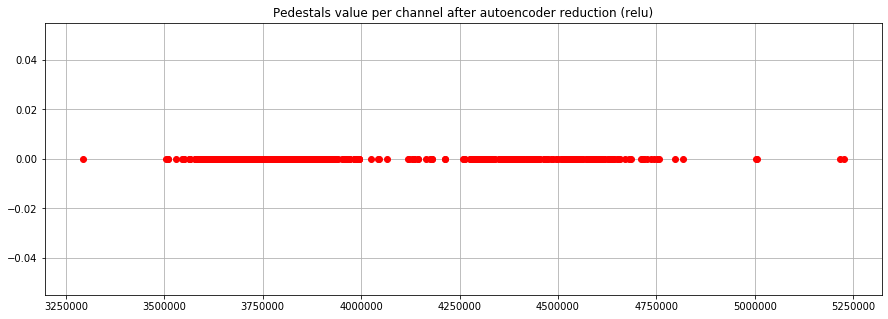

In [51]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (relu)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [52]:
ncol = 2304
model13 = Sequential()

# Encoder Layers
model13.add(Dense(2000, activation = 'tanh', input_shape=(ncol,)))
model13.add(Dense(1750, activation = 'tanh'))
model13.add(Dense(1500, activation = 'tanh'))
model13.add(Dense(1250, activation = 'tanh'))
model13.add(Dense(1000, activation = 'tanh'))
model13.add(Dense(750 , activation = 'tanh'))
model13.add(Dense(500 , activation = 'tanh'))
model13.add(Dense(250 , activation = 'tanh'))
model13.add(Dense(100 , activation = 'tanh'))
model13.add(Dense(50  , activation = 'tanh'))
model13.add(Dense(20  , activation = 'tanh'))
model13.add(Dense(2   , activation = 'tanh', name="bottleneck"))

# Decoder Layers
model13.add(Dense(20  , activation = 'tanh'))
model13.add(Dense(50  , activation = 'tanh'))
model13.add(Dense(100 , activation = 'tanh'))
model13.add(Dense(250 , activation = 'tanh'))
model13.add(Dense(500 , activation = 'tanh'))
model13.add(Dense(750 , activation = 'tanh'))
model13.add(Dense(1000, activation = 'tanh'))
model13.add(Dense(1250, activation = 'tanh'))
model13.add(Dense(1500, activation = 'tanh'))
model13.add(Dense(1750, activation = 'tanh'))
model13.add(Dense(2000, activation = 'tanh'))
model13.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model13.compile(loss = 'mean_squared_error', optimizer = Adam())

model13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_198 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_199 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_200 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_201 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_202 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_203 (Dense)            (None, 500)               375500    
__________

In [53]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model13.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 8s 97ms/step - loss: 1895.3988
Epoch 2/10
84/84 [==============================] - 2s 22ms/step - loss: 1895.6068
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 1887.9233
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 1876.8591
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1873.4169
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1872.2872
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.9111
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7842
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1871.7545
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7404
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1872.4385
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1872.4375
Epo

Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1876.6791
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1455
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1456
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1456
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1459
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1456
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1456
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1456
Epoch 8/10
84/84 [==============================] - 1s 12ms/step - loss: 1878.1459
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1456
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1878.1455
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1879.1924
Ep

Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1883.7404
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1883.7404
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2288
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2286
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2288
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2286
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2286
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.2286
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.2286
Ep

Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.8676
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.8674
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.8674
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1889.3021
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.3022
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.3019
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1889.3021
Epo

Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.8043
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.8044
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.8043
Epoch 10/10
84/84 [==============================] - 1s 12ms/step - loss: 1894.8041
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 2/10
84/84 [==============================] - 1s 12ms/step - loss: 1894.3466
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3463
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: 1894.3466
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1894.3466
Epoch 8/10
84/84 [==============================] - 1s 12ms/step - loss: 1894.3466
Epo

In [54]:
module_encoder = Model(model13.input, model13.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_197 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_198 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_199 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_200 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_201 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_202 (Dense)            (None, 750)               750750    
__________

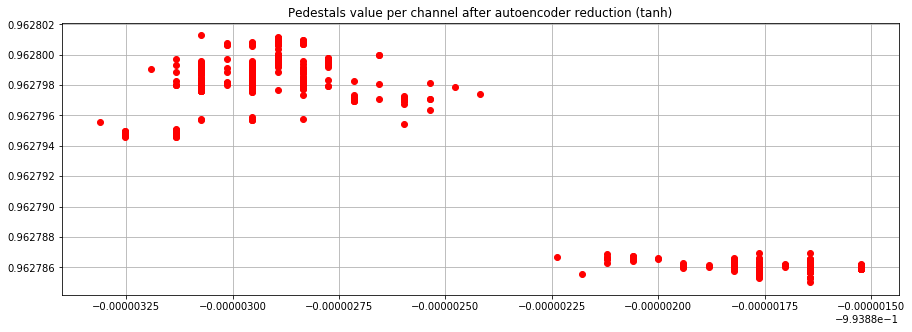

In [55]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (tanh)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [56]:
ncol = 2304
model14 = Sequential()

# Encoder Layers
model14.add(Dense(2000, activation = 'sigmoid', input_shape=(ncol,)))
model14.add(Dense(1750, activation = 'sigmoid'))
model14.add(Dense(1500, activation = 'sigmoid'))
model14.add(Dense(1250, activation = 'sigmoid'))
model14.add(Dense(1000, activation = 'sigmoid'))
model14.add(Dense(750 , activation = 'sigmoid'))
model14.add(Dense(500 , activation = 'sigmoid'))
model14.add(Dense(250 , activation = 'sigmoid'))
model14.add(Dense(100 , activation = 'sigmoid'))
model14.add(Dense(50  , activation = 'sigmoid'))
model14.add(Dense(20  , activation = 'sigmoid'))
model14.add(Dense(2   , activation = 'sigmoid', name="bottleneck"))

# Decoder Layers
model14.add(Dense(20  , activation = 'sigmoid'))
model14.add(Dense(50  , activation = 'sigmoid'))
model14.add(Dense(100 , activation = 'sigmoid'))
model14.add(Dense(250 , activation = 'sigmoid'))
model14.add(Dense(500 , activation = 'sigmoid'))
model14.add(Dense(750 , activation = 'sigmoid'))
model14.add(Dense(1000, activation = 'sigmoid'))
model14.add(Dense(1250, activation = 'sigmoid'))
model14.add(Dense(1500, activation = 'sigmoid'))
model14.add(Dense(1750, activation = 'sigmoid'))
model14.add(Dense(2000, activation = 'sigmoid'))
model14.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model14.compile(loss = 'mean_squared_error', optimizer = Adam())

model14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_221 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_222 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_223 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_224 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_225 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_226 (Dense)            (None, 500)               375500    
__________

In [57]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model14.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 9s 103ms/step - loss: 1895.5692
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1885.4705
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 1877.4385
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1873.4681
Epoch 5/10
84/84 [==============================] - 1s 14ms/step - loss: 1872.2084
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 1871.8501
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1871.7662
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1871.7435
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1871.7383
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1871.7372
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1872.4369
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1872.4369
Ep

Epoch 10/10
84/84 [==============================] - 2s 20ms/step - loss: 1876.6793
Epoch 1/10
84/84 [==============================] - 2s 20ms/step - loss: 1878.1456
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 1878.1456
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: 1878.1459
Epoch 4/10
84/84 [==============================] - 1s 18ms/step - loss: 1878.1455
Epoch 5/10
84/84 [==============================] - 2s 21ms/step - loss: 1878.1456
Epoch 6/10
84/84 [==============================] - 2s 22ms/step - loss: 1878.1455
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 1878.1456
Epoch 8/10
84/84 [==============================] - 2s 18ms/step - loss: 1878.1456
Epoch 9/10
84/84 [==============================] - 2s 18ms/step - loss: 1878.1456
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 1878.1456
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 1879.1920
Ep

Epoch 9/10
84/84 [==============================] - 2s 23ms/step - loss: 1883.7404
Epoch 10/10
84/84 [==============================] - 2s 20ms/step - loss: 1883.7404
Epoch 1/10
84/84 [==============================] - 2s 18ms/step - loss: 1885.2286
Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: 1885.2286
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 1885.2284
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 1885.2286
Epoch 5/10
84/84 [==============================] - 2s 25ms/step - loss: 1885.2286
Epoch 6/10
84/84 [==============================] - 2s 23ms/step - loss: 1885.2286
Epoch 7/10
84/84 [==============================] - 2s 23ms/step - loss: 1885.2284
Epoch 8/10
84/84 [==============================] - 2s 23ms/step - loss: 1885.2286
Epoch 9/10
84/84 [==============================] - 2s 24ms/step - loss: 1885.2286
Epoch 10/10
84/84 [==============================] - 2s 19ms/step - loss: 1885.2286
Ep

Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.8676
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.8674
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.8674
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.3022
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3019
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1889.3022
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 1889.3021
Epo

Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 1894.8043
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.8041
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 1894.8041
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 1894.8043
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 1894.3466
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 1894.3463
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 1894.3463
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 1894.3463
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 1894.3467
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1894.3466
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1894.3466
Epo

In [58]:
module_encoder = Model(model14.input, model14.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_220 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_221 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_222 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_223 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_224 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_225 (Dense)            (None, 750)               750750    
__________

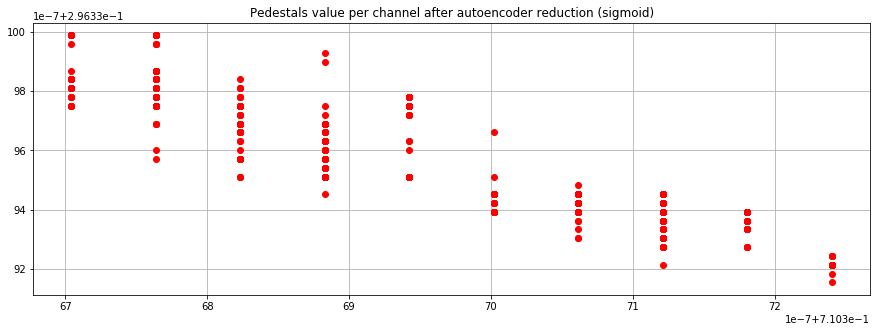

In [59]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (sigmoid)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [60]:
ncol = 2304
model15 = Sequential()

# Encoder Layers
model15.add(Dense(2000, activation = 'exponential', input_shape=(ncol,)))
model15.add(Dense(1750, activation = 'exponential'))
model15.add(Dense(1500, activation = 'exponential'))
model15.add(Dense(1250, activation = 'exponential'))
model15.add(Dense(1000, activation = 'exponential'))
model15.add(Dense(750 , activation = 'exponential'))
model15.add(Dense(500 , activation = 'exponential'))
model15.add(Dense(250 , activation = 'exponential'))
model15.add(Dense(100 , activation = 'exponential'))
model15.add(Dense(50  , activation = 'exponential'))
model15.add(Dense(20  , activation = 'exponential'))
model15.add(Dense(2   , activation = 'exponential', name="bottleneck"))

# Decoder Layers
model15.add(Dense(20  , activation = 'exponential'))
model15.add(Dense(50  , activation = 'exponential'))
model15.add(Dense(100 , activation = 'exponential'))
model15.add(Dense(250 , activation = 'exponential'))
model15.add(Dense(500 , activation = 'exponential'))
model15.add(Dense(750 , activation = 'exponential'))
model15.add(Dense(1000, activation = 'exponential'))
model15.add(Dense(1250, activation = 'exponential'))
model15.add(Dense(1500, activation = 'exponential'))
model15.add(Dense(1750, activation = 'exponential'))
model15.add(Dense(2000, activation = 'exponential'))
model15.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model15.compile(loss = 'mean_squared_error', optimizer = Adam())

model15.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_244 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_245 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_246 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_247 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_248 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_249 (Dense)            (None, 500)               375500    
__________

In [61]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model15.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 9s 109ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: n

Epoch 8/10
84/84 [==============================] - 2s 24ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 2s 20ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 2s 24ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 2s 20ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 2s 24ms/step - loss: n

Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: na

Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: na

Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 1s 12ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: nan


In [62]:
module_encoder = Model(model15.input, model15.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_243 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_244 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_245 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_246 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_247 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_248 (Dense)            (None, 750)               750750    
__________

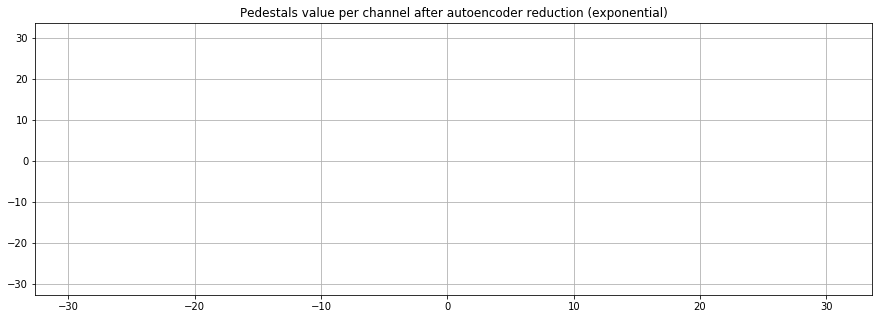

In [63]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (exponential)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [64]:
ncol = 2304
model16 = Sequential()

# Encoder Layers
model16.add(Dense(2000, activation = 'linear', input_shape=(ncol,)))
model16.add(Dense(1750, activation = 'linear'))
model16.add(Dense(1500, activation = 'linear'))
model16.add(Dense(1250, activation = 'linear'))
model16.add(Dense(1000, activation = 'linear'))
model16.add(Dense(750 , activation = 'linear'))
model16.add(Dense(500 , activation = 'linear'))
model16.add(Dense(250 , activation = 'linear'))
model16.add(Dense(100 , activation = 'linear'))
model16.add(Dense(50  , activation = 'linear'))
model16.add(Dense(20  , activation = 'linear'))
model16.add(Dense(2   , activation = 'linear', name="bottleneck"))

# Decoder Layers
model16.add(Dense(20  , activation = 'linear'))
model16.add(Dense(50  , activation = 'linear'))
model16.add(Dense(100 , activation = 'linear'))
model16.add(Dense(250 , activation = 'linear'))
model16.add(Dense(500 , activation = 'linear'))
model16.add(Dense(750 , activation = 'linear'))
model16.add(Dense(1000, activation = 'linear'))
model16.add(Dense(1250, activation = 'linear'))
model16.add(Dense(1500, activation = 'linear'))
model16.add(Dense(1750, activation = 'linear'))
model16.add(Dense(2000, activation = 'linear'))
model16.add(Dense(2304, activation = 'sigmoid'))

# Compile the Model
model16.compile(loss = 'mean_squared_error', optimizer = Adam())

model16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_267 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_268 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_269 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_270 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_271 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_272 (Dense)            (None, 500)               375500    
__________

In [65]:
for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_train = data2
    
    model16.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 8s 99ms/step - loss: 1896.2831
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1898.3447
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1896.2615
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1895.8317
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1888.5117
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1885.0580
Epoch 7/10
84/84 [==============================] - 1s 12ms/step - loss: 1904.0986
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1906.9922
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1910.1542
Epoch 10/10
84/84 [==============================] - 1s 13ms/step - loss: 1909.8838
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1905.7162
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1896.3998
Epo

Epoch 10/10
84/84 [==============================] - 1s 12ms/step - loss: 1903.9935
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1905.4332
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 1905.4332
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1905.4332
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1905.4330
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: 1905.4330
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1905.4332
Epoch 7/10
84/84 [==============================] - 1s 14ms/step - loss: 1905.4330
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 1905.4332
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 1905.4330
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1905.4332
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 1906.5248
Ep

Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1911.0831
Epoch 10/10
84/84 [==============================] - 1s 12ms/step - loss: 1911.0831
Epoch 1/10
84/84 [==============================] - 1s 12ms/step - loss: 1912.6306
Epoch 2/10
84/84 [==============================] - 1s 12ms/step - loss: 1912.6306
Epoch 3/10
84/84 [==============================] - 1s 14ms/step - loss: 1912.6306
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1912.6306
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: 1912.6306
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 1912.6307
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1912.6306
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1912.6306
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1912.6306
Epoch 10/10
84/84 [==============================] - 1s 12ms/step - loss: 1912.6306
Ep

Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1917.2994
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1917.2993
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 1917.2993
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6921
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 1916.6924
Epoch 3/10
84/84 [==============================] - 1s 12ms/step - loss: 1916.6924
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6924
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6921
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6921
Epoch 7/10
84/84 [==============================] - 1s 12ms/step - loss: 1916.6924
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6921
Epoch 9/10
84/84 [==============================] - 1s 13ms/step - loss: 1916.6921
Epo

Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 1922.3676
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 1922.3676
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 1922.3676
Epoch 10/10
84/84 [==============================] - 1s 17ms/step - loss: 1922.3676
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 1921.8802
Epoch 2/10
84/84 [==============================] - 1s 12ms/step - loss: 1921.8802
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 1921.8800
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 1921.8802
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: 1921.8802
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 1921.8802
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: 1921.8800
Epoch 8/10
84/84 [==============================] - 1s 12ms/step - loss: 1921.8804
Epo

In [66]:
module_encoder = Model(model16.input, model16.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266_input (InputLayer) (None, 2304)              0         
_________________________________________________________________
dense_266 (Dense)            (None, 2000)              4610000   
_________________________________________________________________
dense_267 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_268 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_269 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_270 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_271 (Dense)            (None, 750)               750750    
__________

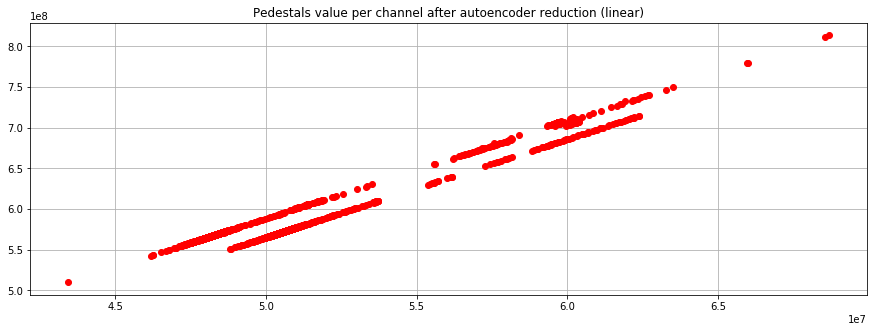

In [67]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (linear)')

for file in data_filesT:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    data2 = data.loc[:, 2:2305]

    data2.index = module_names()
    data2.columns = range(2304)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()